In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
fandango = pd.read_csv("fandango_scrape.csv")

In [24]:
fandango.iloc[:,0:2]

,FILM,STARS
0,Fifty Shades of Grey (2015),4.0
1,Jurassic World (2015),4.5
2,American Sniper (2015),5.0
3,Furious 7 (2015),5.0
4,Inside Out (2015),4.5
...,...,...
505,Valiyavan (2015),0.0
506,WWE SummerSlam 2015 (2015),0.0
507,Yagavarayinum Naa Kaakka (2015),0.0
508,"Yesterday, Today and Tomorrow (1964)",0.0


In [25]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


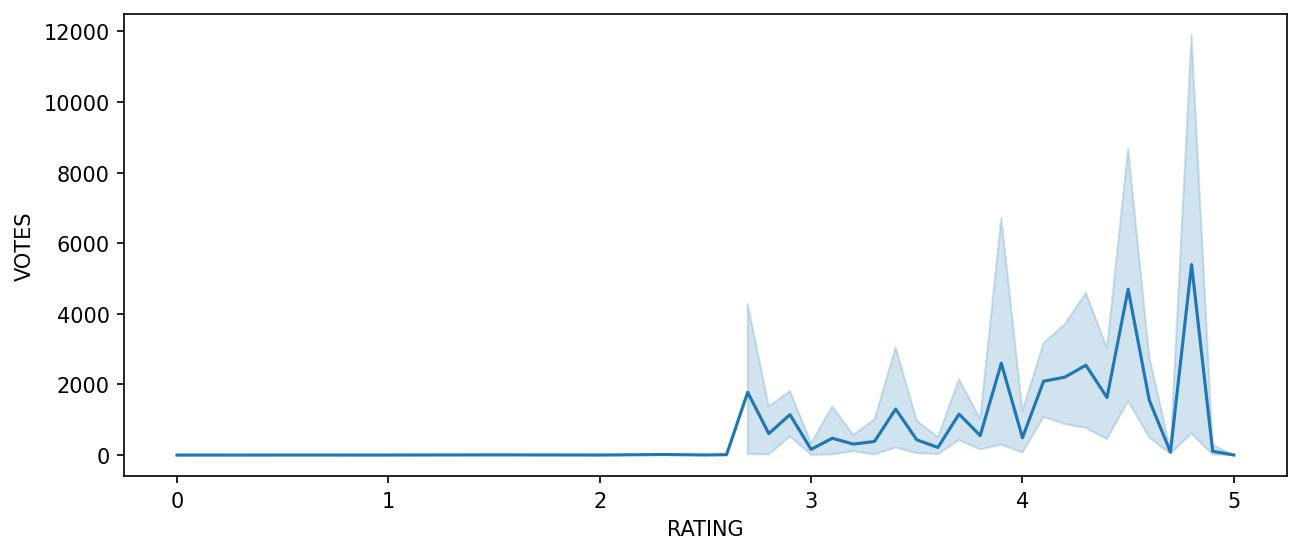

In [26]:
plt.figure(figsize=(10, 4), dpi=150)
sns.lineplot(data=fandango, x="RATING", y="VOTES")
plt.show()

In [27]:
# fandango.corr()

In [28]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [29]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [30]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
1         7
2016      1
1964      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

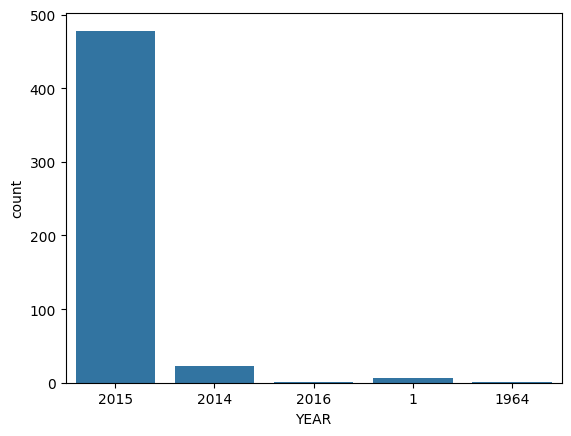

In [31]:
sns.countplot(data=fandango,x='YEAR')

In [32]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [33]:
novotes = fandango['VOTES'] == 0

In [34]:
novotes.sum()

73

In [35]:
fanreviewed = fandango[fandango["VOTES"] > 0]

In [36]:
fanreviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


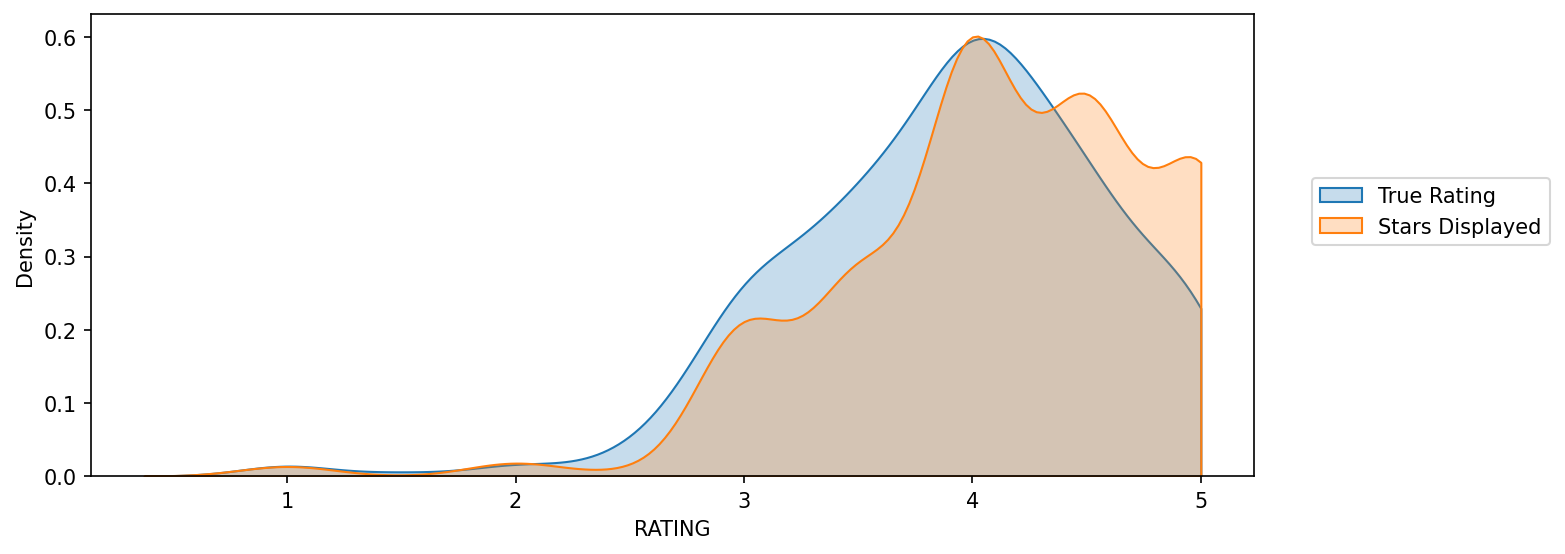

In [37]:
plt.figure(figsize=(10, 4), dpi=150)
sns.kdeplot(data=fanreviewed, x="RATING", clip=[0, 5], fill=True, label="True Rating")
sns.kdeplot(
    data=fanreviewed, x="STARS", clip=[0, 5], fill=True, label="Stars Displayed"
)

plt.legend(loc=(1.05, 0.5))

In [38]:
fanreviewed["STARS_DIFF"] = fanreviewed["STARS"] - fanreviewed["RATING"]
fanreviewed["STARS_DIFF"] = fanreviewed["STARS_DIFF"].round(2)

C:\Users\GAURAV BHATIYA\AppData\Local\Temp\ipykernel_11604\3566645663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanreviewed["STARS_DIFF"] = fanreviewed["STARS"] - fanreviewed["RATING"]
C:\Users\GAURAV BHATIYA\AppData\Local\Temp\ipykernel_11604\3566645663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanreviewed["STARS_DIFF"] = fanreviewed["STARS_DIFF"].round(2)


In [39]:
fanreviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

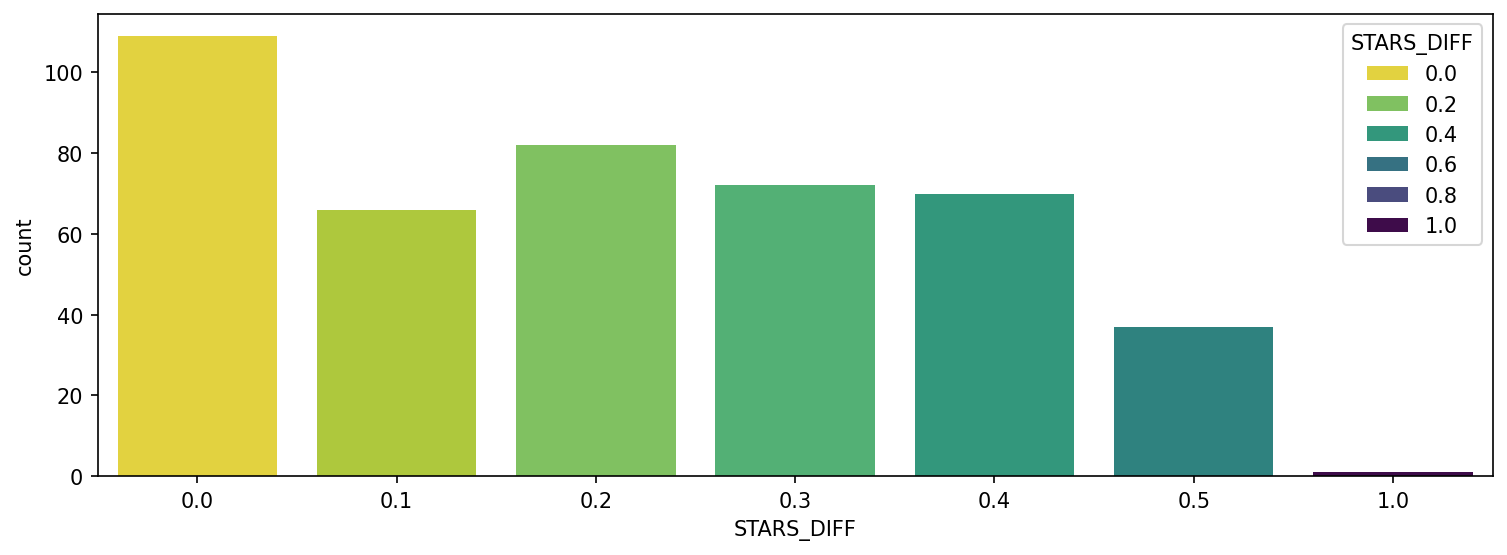

In [40]:
plt.figure(figsize=(12, 4), dpi=150)
sns.countplot(
    data=fanreviewed, x="STARS_DIFF", palette='viridis_r', hue="STARS_DIFF"
)

# palette = viridis
# for reversed color viridis_r